In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pyxdf

In [2]:
WPI_xdf_path = "../HCILab1-Group6.xdf"
CSL_xdf_path = "../CSL_LabPC_0811.xdf"

### View XDF Streams

In [3]:
def view_xdf_streams(xdf_path):
    data, header = pyxdf.load_xdf(xdf_path)
    print(header)

    for stream in data:
        stream_name = stream["info"]["name"][0]
        stream_id = stream["info"]["stream_id"]
        stream_srate = stream["info"]["effective_srate"]
        
        print(f'Stream {stream_name} (Stream ID: {stream_id} with sampling rate {stream_srate})')

In [4]:
view_xdf_streams(WPI_xdf_path)

Stream 1: Calculated effective sampling rate 15.7510 Hz is different from specified rate 30.0000 Hz.


{'info': defaultdict(<class 'list'>, {'version': ['1.0'], 'datetime': ['2024-11-08T09:34:26-0500']})}
Stream Unicorn_HCILab1 (Stream ID: 4 with sampling rate 250.3106784840359)
Stream OBS_HCILab1 (Stream ID: 7 with sampling rate 30.000000237563917)
Stream OBS_HCILab2 (Stream ID: 1 with sampling rate 15.750970243736306)
Stream Unicorn_HCILab2 (Stream ID: 5 with sampling rate 235.71778342981557)
Stream OBS_CSL_LabPC (Stream ID: 2 with sampling rate 60.00035847540305)
Stream Unicorn_CSL_LabPC (Stream ID: 6 with sampling rate 247.4743663519818)
Stream OBS_CSL_Laptop (Stream ID: 3 with sampling rate 29.99991705943873)


In [5]:
view_xdf_streams(CSL_xdf_path)

{'info': defaultdict(<class 'list'>, {'version': ['1.0'], 'datetime': ['2024-11-08T15:34:00+0100']})}
Stream OBS_CSL_LabPC (Stream ID: 1 with sampling rate 60.00000234283419)
Stream Unicorn_CSL_LabPC (Stream ID: 3 with sampling rate 248.2992764888637)
Stream Unicorn_CSL_Laptop (Stream ID: 5 with sampling rate 250.24662288669091)
Stream OBS_CSL_Laptop (Stream ID: 4 with sampling rate 29.99973883019025)
Stream Unicorn_HCILab1 (Stream ID: 2 with sampling rate 250.31628596347235)


WPI HCI Lab Streams:


Stream 1: Calculated effective sampling rate 15.7510 Hz is different from specified rate 30.0000 Hz.


Stream Unicorn_HCILab1 has 1008116 time stamps, starting with 611253.3354233088


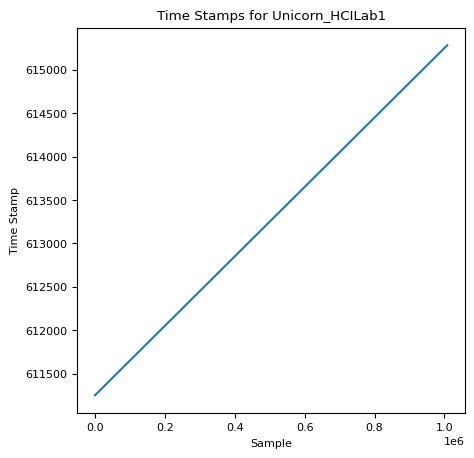

Stream OBS_HCILab1 has 120823 time stamps, starting with 611253.3782084001
Stream OBS_HCILab1 with time series (UNIX) begins with 1731076466.614
Stream OBS_HCILab2 has 21272 time stamps, starting with 611198.701273934
Stream OBS_HCILab2 with time series (UNIX) begins with 1731076466.789
Stream Unicorn_HCILab2 has 301187 time stamps, starting with 611240.2445216796


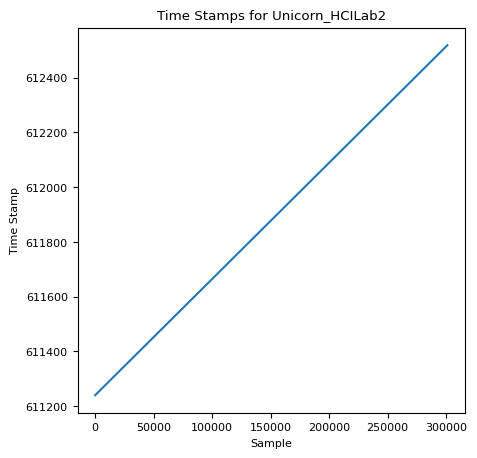

Stream OBS_CSL_LabPC has 235769 time stamps, starting with 611253.5281848038
Stream OBS_CSL_LabPC with time series (UNIX) begins with 1731076466.921
Stream Unicorn_CSL_LabPC has 975999 time stamps, starting with 611247.0746992254


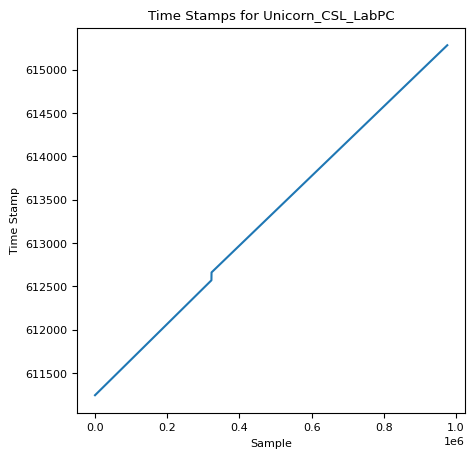

Stream OBS_CSL_Laptop has 118827 time stamps, starting with 611253.537911259
Stream OBS_CSL_Laptop with time series (UNIX) begins with 1731076469.039

CSL Lab Streams:
Stream OBS_CSL_LabPC has 241375 time stamps, starting with 965124.963829166
Stream OBS_CSL_LabPC with time series (UNIX) begins with 1731076440.921
Stream Unicorn_CSL_LabPC has 998320 time stamps, starting with 965132.3999757385


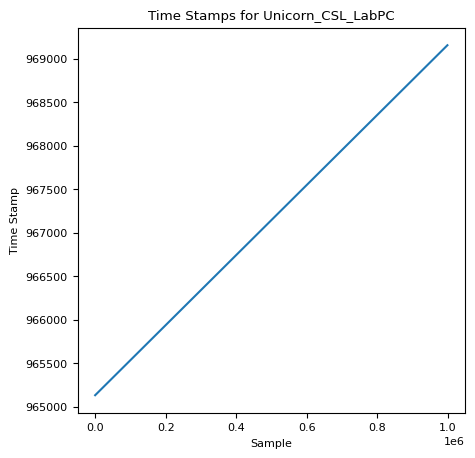

Stream Unicorn_CSL_Laptop has 1006768 time stamps, starting with 965124.7277521023


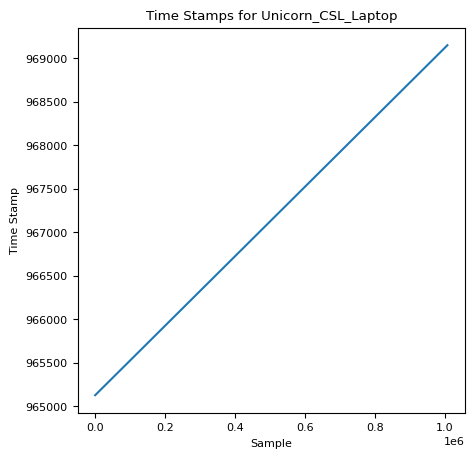

Stream OBS_CSL_Laptop has 120687 time stamps, starting with 965124.9733625452
Stream OBS_CSL_Laptop with time series (UNIX) begins with 1731076443.041
Stream Unicorn_HCILab1 has 335063 time stamps, starting with 965125.0904548706


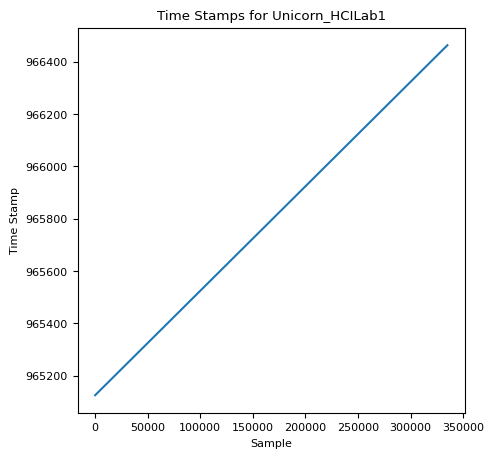

In [6]:
def examine_timestamps_length(xdf_path):
    data, header = pyxdf.load_xdf(xdf_path)
    
    for stream in data:
        stream_name = stream["info"]["name"][0]
        
        time_stamps = stream["time_stamps"]
        
        print(f'Stream {stream_name} has {len(time_stamps)} time stamps, starting with {time_stamps[0]}')
        
        time_series = stream["time_series"]
        if stream_name.startswith("OBS"):
            print(f"Stream {stream_name} with time series (UNIX) begins with {time_series[0][0]}")
        
        if "Unicorn" in stream_name:
            # plot the time stamps
            plt.rc('font', size=8)
            plt.figure(figsize=(5, 5))
            plt.plot(time_stamps)
            plt.xlabel('Sample')
            plt.ylabel('Time Stamp')
            plt.title(f"Time Stamps for {stream_name}")
            plt.show()

# Examine the length of all time stamps in each stream for both XDF files
print("WPI HCI Lab Streams:")
examine_timestamps_length(WPI_xdf_path)

print("\nCSL Lab Streams:")
examine_timestamps_length(CSL_xdf_path)

### Sync Streams!!

In [7]:
def sync_streams(data_streams_1, data_streams_2):
    
    """
    Sync the data by trimming time_stamp and time_series streams so that all EEG and Unicorn Streams begin at the same time
    
    Parameters:
    - data_streams_1: Stream data from WPI HCI Lab xdf file
    - data_streams_2: Stream data from CSL Lab xdf file
    """
    
    # Holds the 8 streams (4 OBS and 4 Unicorn)
    streams = {}
    
    # Create mappings of the 8 stream names to streams
    for stream in data_streams_1:
        stream_name = stream["info"]["name"][0]
        
        if stream_name in ["OBS_HCILab1", "Unicorn_HCILab1", "OBS_HCILab2", "Unicorn_HCILab2"]:
            streams[stream_name] = stream
            
    for stream in data_streams_2:
        stream_name = stream["info"]["name"][0]
        
        if stream_name in ["OBS_CSL_Laptop", "Unicorn_CSL_Laptop", "OBS_CSL_LabPC", "Unicorn_CSL_LabPC"]:
            streams[stream_name] = stream
    
    # From the OBS Video (when Chris says "Begin" and "Time's Up")
    start_unix_timestamp = 1731076647.970
    end_unix_timestamp = 1731080278.120
    duration = end_unix_timestamp - start_unix_timestamp
    frames = 250 * duration
    
    # Trim all the other streams based on the latest Unix timestamp
    for OBS_stream_name, EEG_stream_name in [("OBS_HCILab1", "Unicorn_HCILab1"), ("OBS_HCILab2", "Unicorn_HCILab2"), ("OBS_CSL_Laptop", "Unicorn_CSL_Laptop"), ("OBS_CSL_LabPC", "Unicorn_CSL_LabPC")]:
        OBS_stream = streams[OBS_stream_name]
        EEG_stream = streams[EEG_stream_name]
        
        # First, find the LabRecorder timestamp in the OBS stream that corresponds to the start and end Unix timestamp
        OBS_unix_times = [ts[0] for ts in OBS_stream["time_series"]]
        start_OBS_index = np.searchsorted(OBS_unix_times, start_unix_timestamp)
        end_OBS_index = np.searchsorted(OBS_unix_times, end_unix_timestamp)
        
        start_labrecorder_timestamp = OBS_stream["time_stamps"][start_OBS_index]
        
        # Find the index in the EEG stream where this LabRecorder timestamp occurs
        start_EEG_index = np.searchsorted(EEG_stream["time_stamps"], start_labrecorder_timestamp)
        end_EEG_index = start_EEG_index + round(frames)
        
        # Trim all the data in the OBS and EEG streams based on this index
        OBS_stream["time_stamps"] = OBS_stream["time_stamps"][start_OBS_index:end_OBS_index]
        OBS_stream["time_series"] = OBS_stream["time_series"][start_OBS_index:end_OBS_index]
        EEG_stream["time_stamps"] = EEG_stream["time_stamps"][start_EEG_index:end_EEG_index]
        EEG_stream["time_series"] = EEG_stream["time_series"][start_EEG_index:end_EEG_index]
    
    return streams

In [8]:
# Load the XDF data for both labs
WPI_data_streams, WPI_header = pyxdf.load_xdf(WPI_xdf_path)
CSL_data_streams, CSL_header = pyxdf.load_xdf(CSL_xdf_path)

Stream 1: Calculated effective sampling rate 15.7510 Hz is different from specified rate 30.0000 Hz.


In [9]:
# Before syncing the streams, let's examine the time_stamps and time_series in both files
def print_time_stamps_and_series(data_streams):
    for stream in data_streams:
        stream_name = stream["info"]["name"][0]
        print(f'\nStream {stream_name} has {len(stream["time_stamps"])} time stamps and {len(stream["time_series"])} time series')
        
        if len(stream["time_stamps"]) > 0:
            print(f'Time stamps: [{stream["time_stamps"][0]} ... {stream["time_stamps"][-1]}]')
        
        if stream_name.startswith("OBS") and len(stream["time_series"]) > 0:
            print(f'Time series (UNIX): [{stream["time_series"][0][0]} ... {stream["time_series"][-1][0]}]')
        
print("WPI HCI Lab Streams before syncing:")
print_time_stamps_and_series(WPI_data_streams)

print("\nCSL Lab Streams before syncing:")
print_time_stamps_and_series(CSL_data_streams)

WPI HCI Lab Streams before syncing:

Stream Unicorn_HCILab1 has 1008116 time stamps and 1008116 time series
Time stamps: [611253.3354233088 ... 615280.7904438567]

Stream OBS_HCILab1 has 120823 time stamps and 120823 time series
Time stamps: [611253.3782084001 ... 615280.7781765077]
Time series (UNIX): [1731076466.614 ... 1731080494.093]

Stream OBS_HCILab2 has 21272 time stamps and 21272 time series
Time stamps: [611198.701273934 ... 612549.1879194229]
Time series (UNIX): [1731076466.789 ... 1731077783.883]

Stream Unicorn_HCILab2 has 301187 time stamps and 301187 time series
Time stamps: [611240.2445216796 ... 612517.9845918027]

Stream OBS_CSL_LabPC has 235769 time stamps and 235769 time series
Time stamps: [611253.5281848038 ... 615280.7374605017]
Time series (UNIX): [1731076466.921 ... 1731080494.154]

Stream Unicorn_CSL_LabPC has 975999 time stamps and 975999 time series
Time stamps: [611247.0746992254 ... 615280.3859351258]

Stream OBS_CSL_Laptop has 118827 time stamps and 11882

In [10]:
# Sync the streams based on the shared stream's timestamp
streams = sync_streams(WPI_data_streams, CSL_data_streams)

In [11]:
print("WPI HCI Lab Streams AFTER syncing:")
print_time_stamps_and_series(WPI_data_streams)

print("\nCSL Lab Streams AFTER syncing:")
print_time_stamps_and_series(CSL_data_streams)

WPI HCI Lab Streams AFTER syncing:

Stream Unicorn_HCILab1 has 907537 time stamps and 907537 time series
Time stamps: [611434.7459816559 ... 615060.3843458584]

Stream OBS_HCILab1 has 108902 time stamps and 108902 time series
Time stamps: [611434.7448736306 ... 615064.7781782182]
Time series (UNIX): [1731076647.981 ... 1731080278.088]

Stream OBS_HCILab2 has 17701 time stamps and 17701 time series
Time stamps: [611425.4225287429 ... 612549.1879194229]
Time series (UNIX): [1731076648.002 ... 1731077783.883]

Stream Unicorn_HCILab2 has 257537 time stamps and 257537 time series
Time stamps: [611425.4236271522 ... 612517.9845918027]

Stream OBS_CSL_LabPC has 235769 time stamps and 235769 time series
Time stamps: [611253.5281848038 ... 615280.7374605017]
Time series (UNIX): [1731076466.921 ... 1731080494.154]

Stream Unicorn_CSL_LabPC has 975999 time stamps and 975999 time series
Time stamps: [611247.0746992254 ... 615280.3859351258]

Stream OBS_CSL_Laptop has 118827 time stamps and 118827 

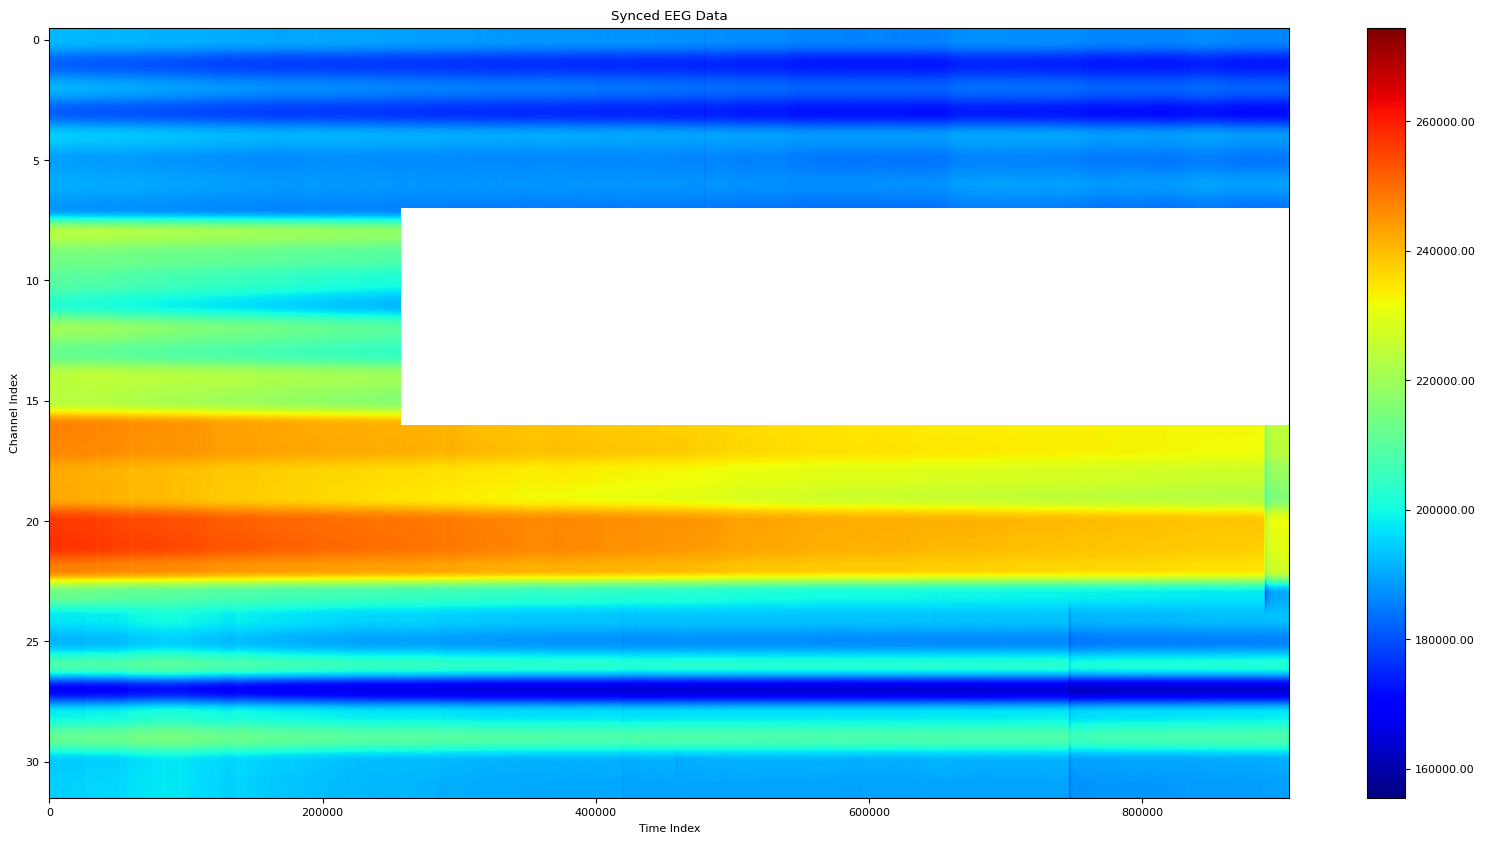

Min: 155528.265625
Max: 274445.8125
Mean: 204481.65171882036
Standard Deviation: 23657.302297087735


In [13]:
import scipy.io

# Disable scientific notation in NumPy globally
np.set_printoptions(suppress=True)

# find the max length of time_series in all EEG streams to establish dimensions for synced EEG streams
max_length = 0

for stream_name in ["Unicorn_HCILab1", "Unicorn_HCILab2", "Unicorn_CSL_Laptop", "Unicorn_CSL_LabPC"]:
    max_length = max(max_length, len(streams[stream_name]["time_series"]))

# Create an np array to hold the synced EEG data with dimensions (max_length, 4 * 8)
synced_EEG_data = np.full((max_length, 4 * 8), np.nan)

# Fill in the synced EEG data
for j, stream_name in enumerate(["Unicorn_HCILab1", "Unicorn_HCILab2", "Unicorn_CSL_Laptop", "Unicorn_CSL_LabPC"]):
    EEG_stream = streams[stream_name]
    
    for time_index, eeg_data in enumerate(EEG_stream["time_series"]):
        synced_EEG_data[time_index, j * 8:(j + 1) * 8] = eeg_data[0:8]

# Visualize the synced EEG data
plt.figure(figsize=(20, 10))
plt.imshow(synced_EEG_data.T, aspect='auto', cmap='jet')
plt.colorbar(format='%.2f')  # Ensures color bar does not use scientific notation
plt.title("Synced EEG Data")
plt.xlabel("Time Index")
plt.ylabel("Channel Index")
plt.show()

print("Min:", np.nanmin(synced_EEG_data))
print("Max:", np.nanmax(synced_EEG_data))
print("Mean:", np.nanmean(synced_EEG_data))
print("Standard Deviation:", np.nanstd(synced_EEG_data))

# Download the EEG data as an .mat file
scipy.io.savemat('task_cutoff_EEG_data_6.mat', {'task_cutoff_EEG_data_6': synced_EEG_data})